**Credit Card Fraud Detection Project:**

*Life cycle of Machine learning Project*

- Understanding the Problem Statement

- Data Collection

- Data Checks to perform

- Exploratory data analysis

- Data Pre-Processing

- Model Training

- Choose best model

**Project Title:** Predicting whether a customer will default on his/her credit card



**1.Understanding the Problem Statement**,**(Problem Description)**

This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments



**Data Description**

Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:


X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.


X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.


X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

**2.Data Collection**

We collected the data from Kaggle website. The dataset is available at https://www.kaggle.com/mlg-ulb/creditcardfraud   

Data consist of 30000rows and 25 columns

### 2.1 Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [167]:
# importing liabraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


**Import the excel Data as Pandas DataFrame**

In [168]:
df=pd.read_excel("default of credit card data.xls",header=1)

**Show Top 5 Records**

In [169]:
# first five rows of credit card data
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**Show Last 5 Records**

In [170]:
# last five rows of credit card data

df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


**Shape of the dataset**

In [171]:
# No.of rows and columns of credit card data
df.shape 

(30000, 25)

**Check Null and Datatypes in the dataset**

In [172]:
#informations of credit card data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

**Statistical Summary of the dataset**

In [173]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


 **- Data Checks to perform**

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [174]:
# checking dataset having null values or not
df.isnull()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [175]:
# checking null values in the data set columns wise 
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [176]:
# checking data types
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [177]:
# checkig duplicated values in the data set
df.duplicated().sum()

0

In [178]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

## 3. EXPLORING DATA

In [179]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 25 numerical features : ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']

We have 0 categorical features : []


In [180]:
# proportion of count data on categorical columns
#for col in categorical_features:
    #print(df[col].value_counts(normalize=True) * 100)
    #print('---------------------------')

## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

Other Type of Analysis are
* **Bivariate Analysis:** The analysis of two variables.
* **Multivariate Analysis:** The analysis of two or more variables.

In [181]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [182]:
df.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1


### Numerical Features

In [183]:
#plt.figure(figsize=(15, 10))
#plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.9, y=1.)

#for i in range(1, len(numeric_features)):
 #   plt.subplot(2,2,i+2)
  #  sns.kdeplot(x=df[numeric_features[i]], color='red')
   # plt.xlabel(numeric_features[i])
    #plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Num.png')

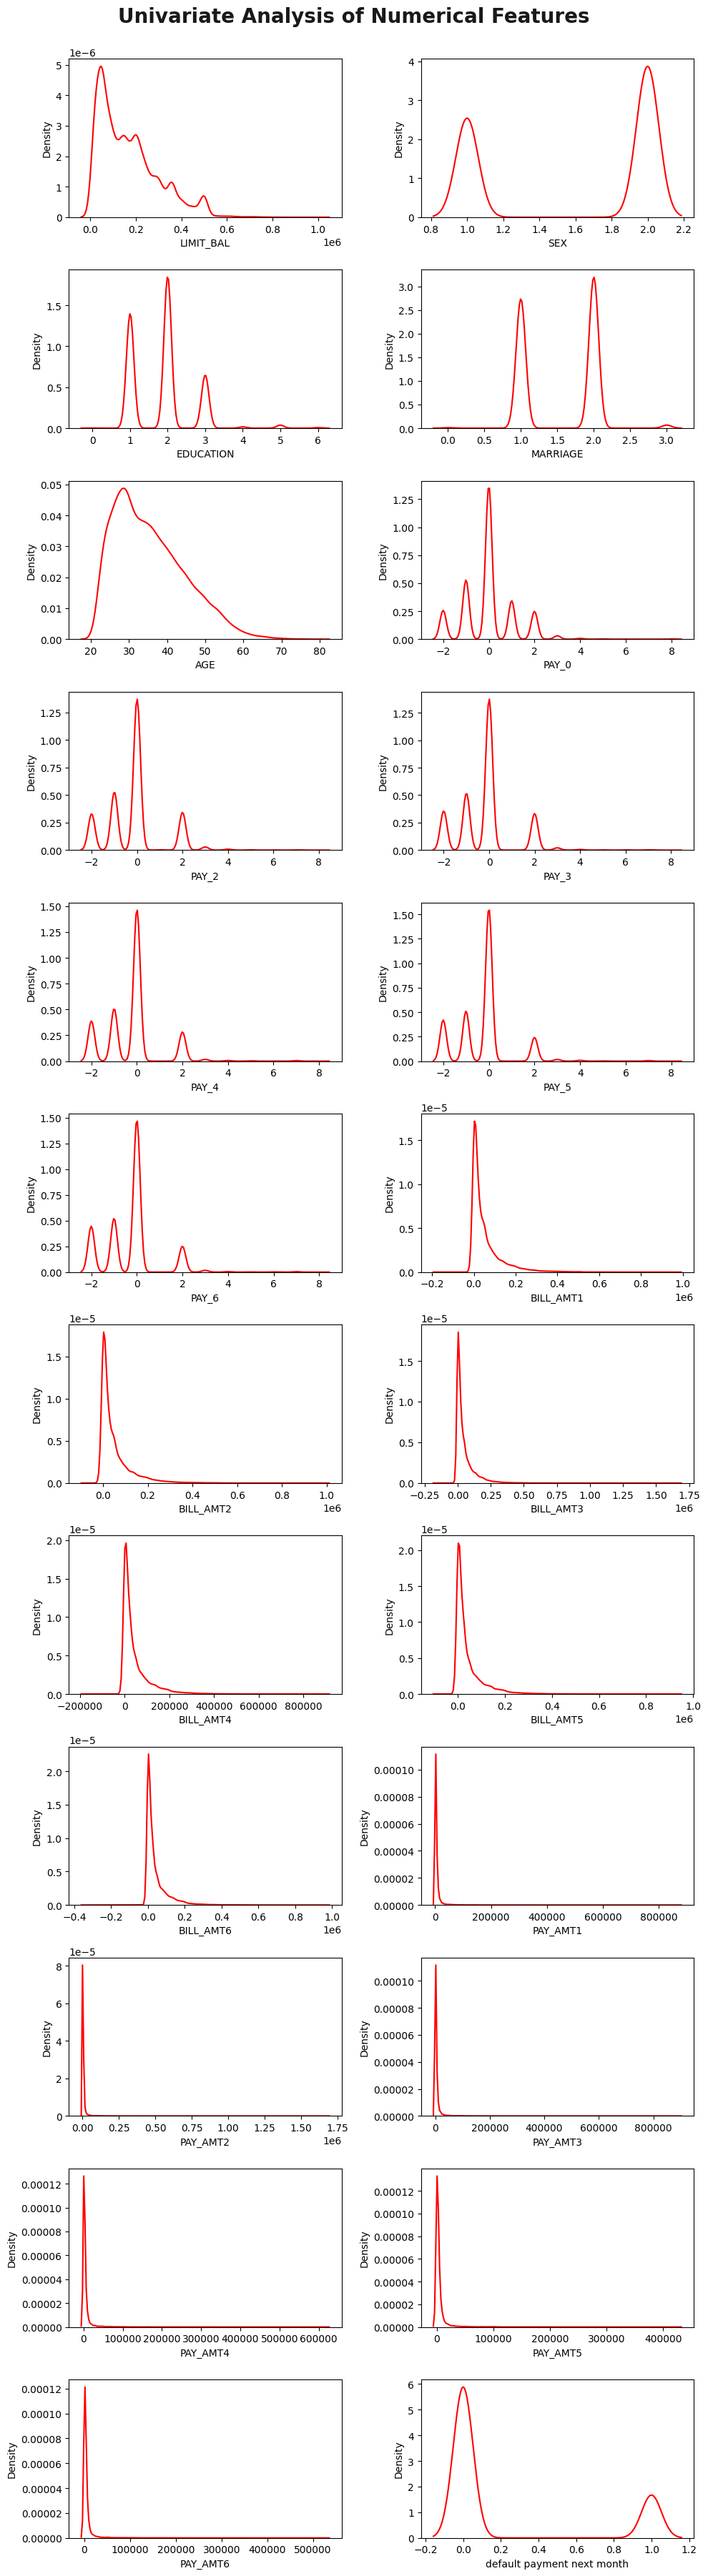

In [184]:
import math
numeric_features.remove("ID")
num_features = len(numeric_features)
rows = math.ceil(num_features / 2)  # Calculate number of rows

plt.figure(figsize=(10, 3 * rows))  # Adjust figure size based on the number of rows
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.9, y=1.)

for i in range(num_features):
    plt.subplot(rows, 2, i+1)  # 2 columns for each row
    sns.kdeplot(x=df[numeric_features[i]], color='red')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

# Save plot
# plt.savefig('./images/Univariate_Num.png')


**Insights**

All most all variables are right skew because of effects of outliers

### Categorical Features

In [185]:
# categorical columns
#categorical_features.remove('Age')
#plt.figure(figsize=(15, 8))
#plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

#for i in range(0, len(categorical_features)):
 #   plt.subplot(3, 3, i+1)
  ## plt.xlabel(categorical_features[i])
    #plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Cat.png')

**Insights**

- there No categorical variable Given data

In [186]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 10 discrete features : ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default payment next month']

We have 14 continuous_features : ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


# Categorical nature but are in discrete

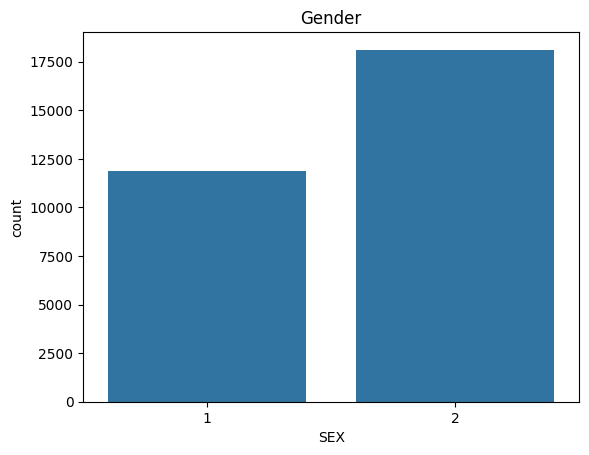

In [187]:
sns.countplot(x='SEX',data=df)
plt.title("Gender")
plt.show()

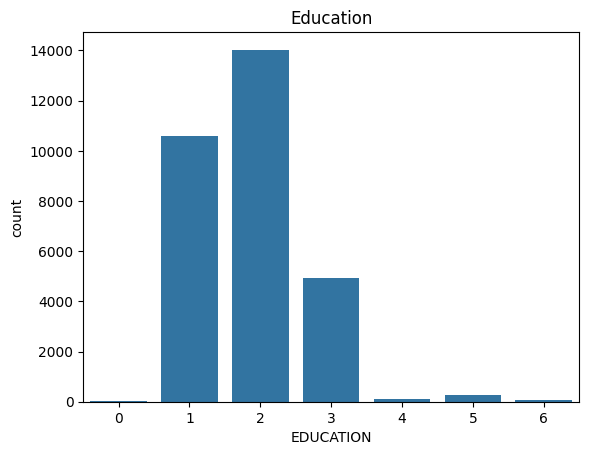

In [188]:
sns.countplot(x='EDUCATION',data=df)
plt.title("Education")
plt.show()

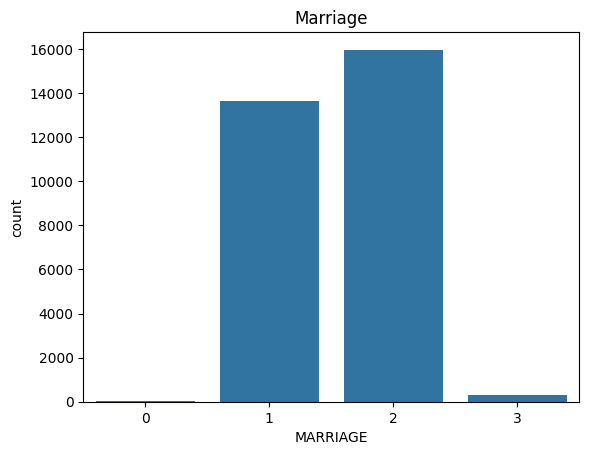

In [189]:
sns.countplot(x='MARRIAGE',data=df)
plt.title("Marriage")
plt.show()

**Insights**

 - all this SEX, EDUCATION,MARRIAGE  of the columns are balanced.

In [190]:
df.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1


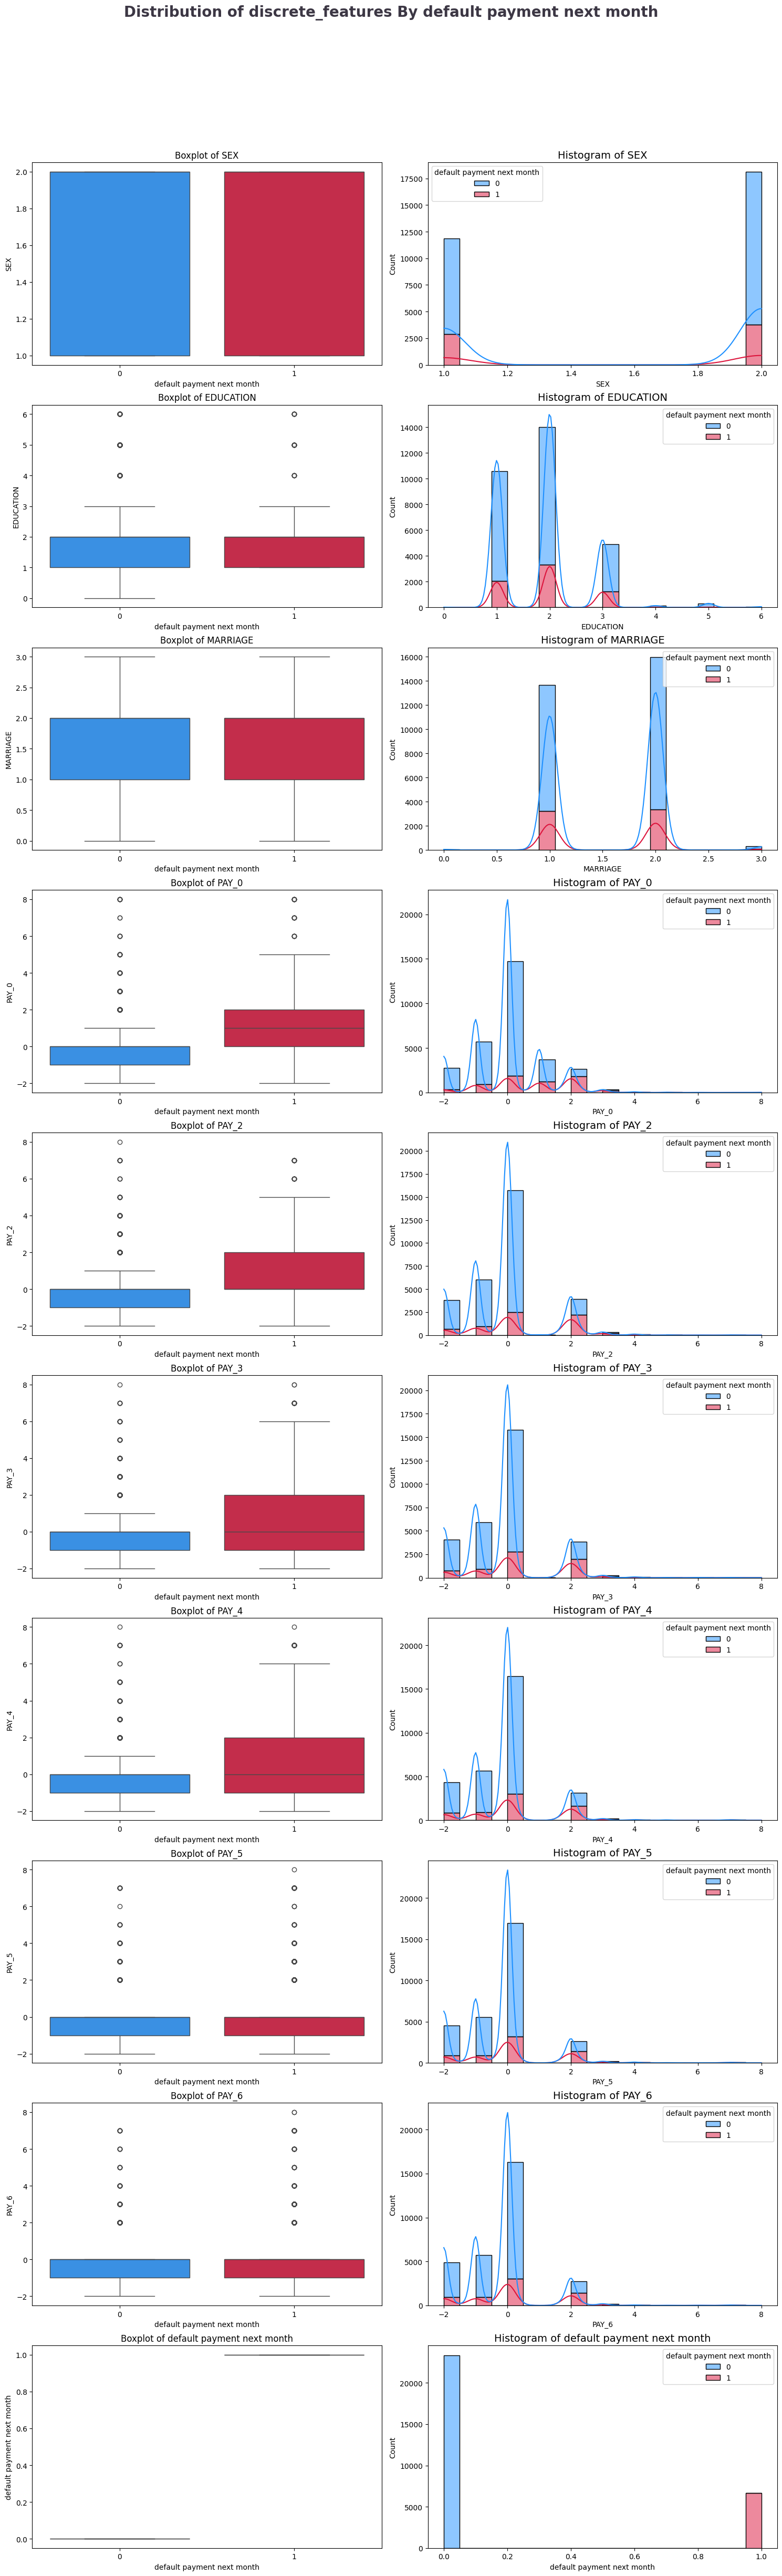

In [191]:
clr1 = ['#1E90FF', '#DC143C']
num_rows = 10 # Define the number of rows in the subplot grid

# Calculate the number of columns based on the number of features
num_cols = math.ceil(len(discrete_features) / num_rows)

# Adjust the figure size to accommodate all the subplots
fig_width = 15
fig_height = 5 * num_rows  # Adjust height to fit all rows nicely

fig, ax = plt.subplots(num_rows, 2, figsize=(fig_width, fig_height))
fig.suptitle('Distribution of discrete_features By default payment next month', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')

for i, col in enumerate(discrete_features):   
    if i < num_rows * 2:  # Create subplots only if within the range of available space
        row_index = i % num_rows
        col_index = i // num_rows
        
        sns.boxplot(data=df, x='default payment next month', y=col,  palette=clr1, ax=ax[row_index, 0])
        ax[row_index, 0].set_title(f'Boxplot of {col}', fontsize=12)

        sns.histplot(data=df, x=col, hue='default payment next month', bins=20, kde=True, 
                     multiple='stack', palette=clr1, ax=ax[row_index, 1])
        ax[row_index, 1].set_title(f'Histogram of {col}', fontsize=14)
    else:
        break  # Stop creating subplots if we run out of features

# Hide unused subplots
for i in range(len(discrete_features), num_rows * 2):
    ax[i // 2, i % 2].axis('on')

fig.tight_layout()
fig.subplots_adjust(top=0.92)
# plt.savefig('images/multivariate_num.png')

- ## Initial Analysis Report

* **The `ID` column can be deleted because each row has unique values.**

 **The `Default payment next month` column is the target to predict.**

 **In the Categorical column like sex, education, marriage , features had made Binary numerical in given data**

 * **There are No missing values in the dataset.**
 * **There are no duplicate values in the dataset.**

 - All this discreate features  are equal impotance to Target column**

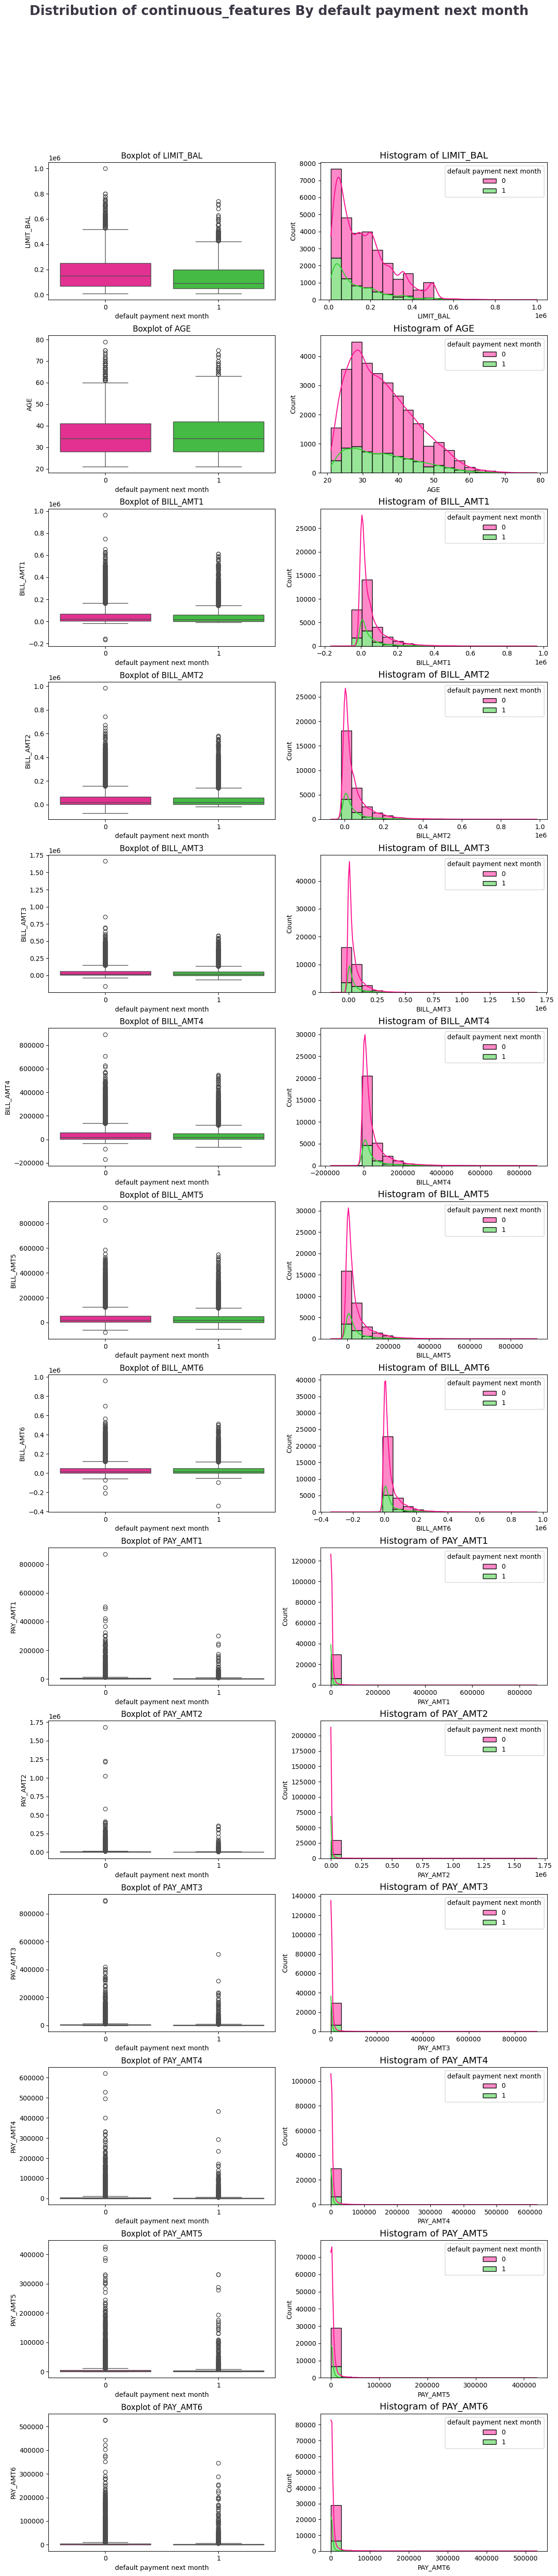

In [192]:
import math

clr2 = ['#FF1493', '#32CD32', '#FFD700', '#9400D3', '#00CED1']  # Different color palette

num_rows = 14  # Define the number of rows in the subplot grid
num_cols = 2   # Define the number of columns

# Adjust the figure size to accommodate all the subplots
fig_width = 12
fig_height = 4 * num_rows  # Adjust height to fit all rows nicely

fig, ax = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))
fig.suptitle('Distribution of continuous_features By default payment next month', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')

# Create a custom color palette using the specified colors
custom_palette = sns.color_palette(clr2)

for i, col in enumerate(continuous_features[:num_rows * num_cols]):   
    row_index = i % num_rows
    col_index = i // num_rows
    
    sns.boxplot(data=df, x='default payment next month', y=col,  palette=custom_palette, ax=ax[row_index, 0])
    ax[row_index, 0].set_title(f'Boxplot of {col}', fontsize=12)

    sns.histplot(data=df, x=col, hue='default payment next month', bins=20, kde=True, 
                 multiple='stack', palette=custom_palette, ax=ax[row_index, 1])
    ax[row_index, 1].set_title(f'Histogram of {col}', fontsize=14)

# Hide unused subplots
for i in range(len(continuous_features), num_rows * num_cols):
    ax[i // num_cols, i % num_cols].axis('on')

fig.tight_layout()
fig.subplots_adjust(top=0.92)
# plt.savefig('images/multivariate_num.png')


* **All  continue features  are  right skewed with outliers above upper bound of box plot. Except credit_limit, Age**

### Check Multicollinearity for Categorical features

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e case_status**

Null Hypothesis ($ H_0 $): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis ($ H_1 $): The Feature and Target column are not independent (Correalted)


In [193]:
#from scipy.stats import chi2_contingency
#chi2_test = []
#for feature in categorical_features:
 #   if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
  #      chi2_test.append('Reject Null Hypothesis')
   # else:
    #    chi2_test.append('Fail to Reject Null Hypothesis')
#result = pd.DataFrame(data=[categorical_features, chi2_test]).T
#result.columns = ['Column', 'Hypothesis Result']
#result

fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

### Checking Null Values

In [194]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

## 4. Visualization

### 4.1 Visualize the Target Feature

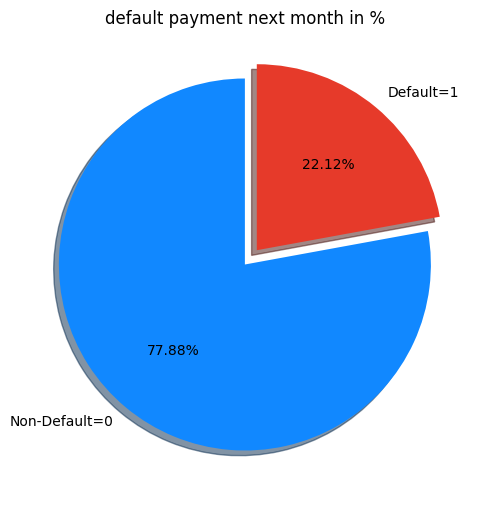

In [195]:
percentage = df['default payment next month'].value_counts(normalize=True)*100
labels = ["Non-Default=0","Default=1"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(6, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
plt.title("default payment next month in %")
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()


## Target column
- Non-defaulter were 23364, Defaulter were 6636

- the above pie charts said Non-defaulters 77.88% ,and defaulter were 22.12%

* From the chart it is seen that the Target Variable is Imbalanced
**What is imbalanced data?**

Imbalanced data are types of data where the target class has an uneven distribution of observations, i.e Here non-default value has more count than the default value of the dataset.

### 4.2 Does applicat credit_Limit has any impact on Credit card default ?

In [196]:
df.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1


In [197]:
#group data by credit limit and their count of case_status
df.groupby('LIMIT_BAL')['default payment next month'].value_counts(normalize=True).to_frame()*100

proportion
LIMIT_BAL default payment next month            
10000     0                            60.040568
          1                            39.959432
16000     0                           100.000000
20000     0                            64.676113
          1                            35.323887
...                                          ...
750000    0                           100.000000
760000    0                           100.000000
780000    0                           100.000000
800000    0                           100.000000
1000000   0                           100.000000

[145 rows x 1 columns]

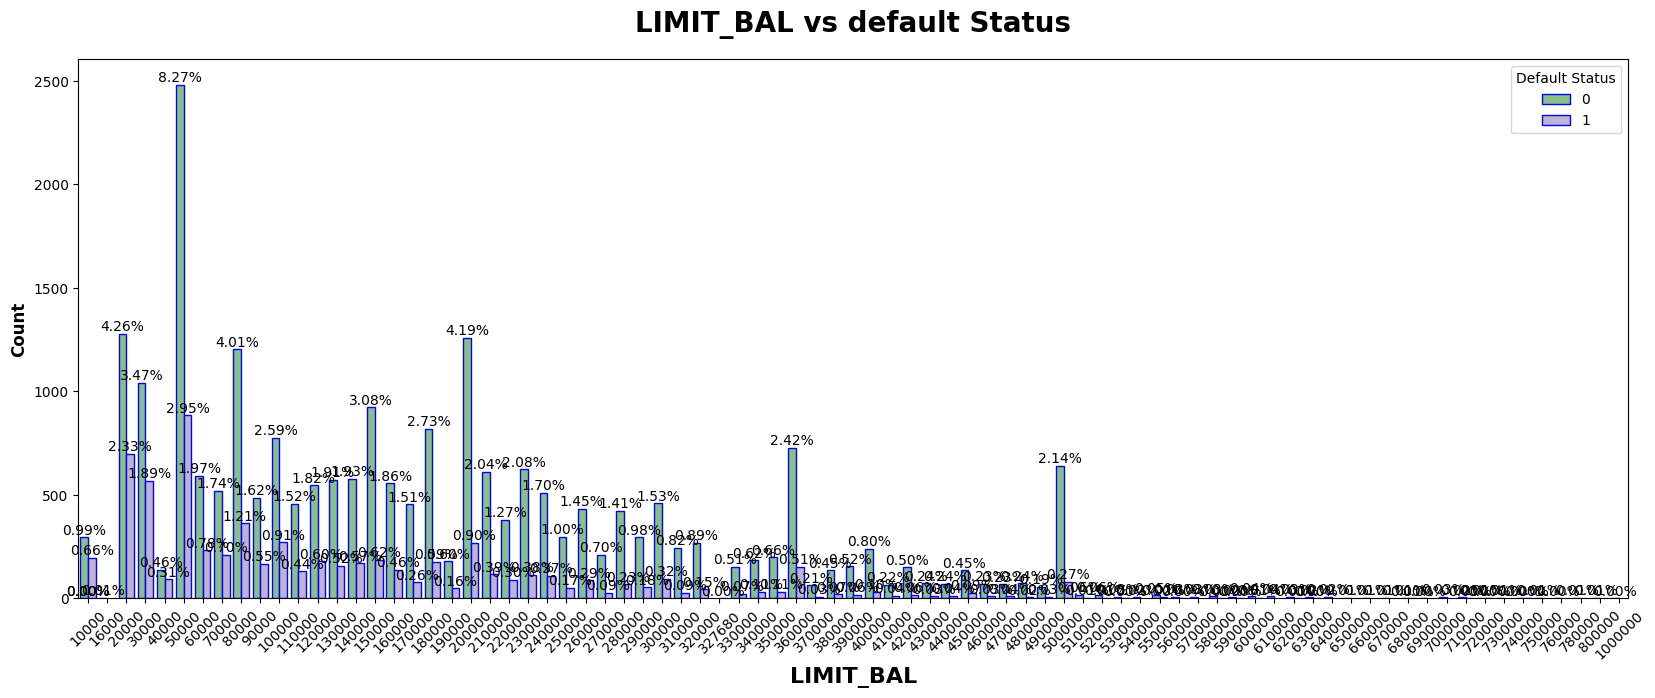

In [198]:
# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(20, 7))

# Plot the countplot
sns.countplot(x="LIMIT_BAL", hue="default payment next month", data=df, ec="blue", palette="Accent", ax=ax)
plt.title("LIMIT_BAL vs default Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("LIMIT_BAL", weight="bold", fontsize=16)
plt.legend(title="Default Status", fancybox=True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Calculate percentages and annotate on top of each bar
total_counts = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_counts) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


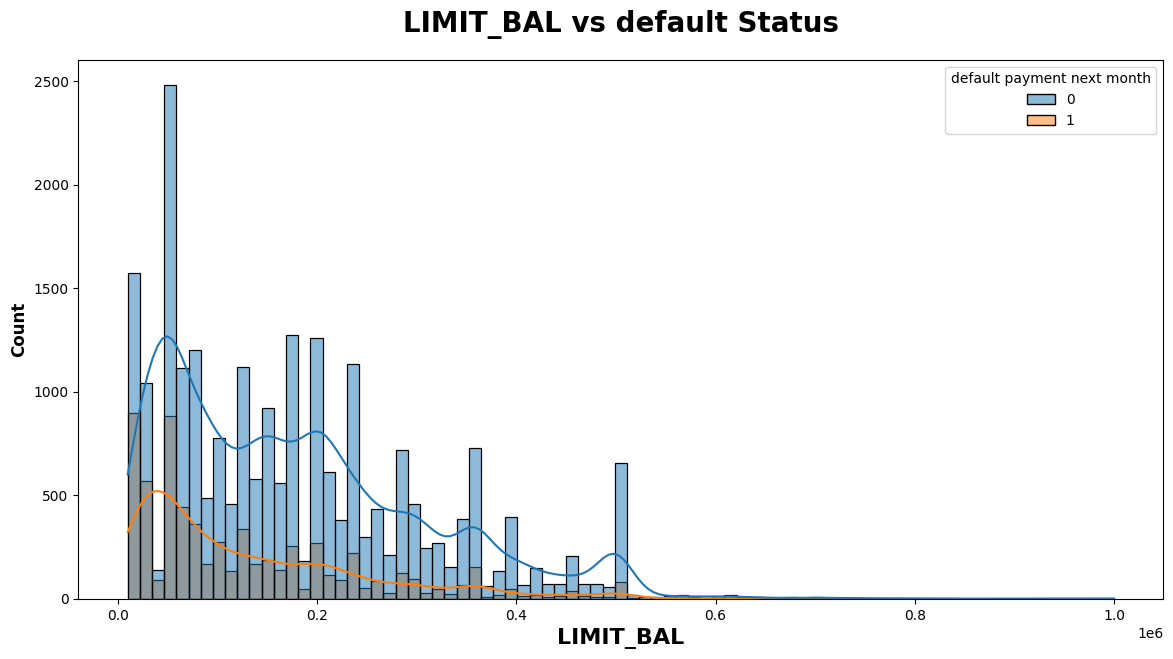

In [199]:
plt.subplots(figsize=(14,7))
sns.histplot(x="LIMIT_BAL",hue="default payment next month", data=df, kde=True)
plt.title("LIMIT_BAL vs default Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("LIMIT_BAL", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

**Insights**
- The Most Customers had took Credit limit was 50,000 and the hieght defauleters were also in credit limit of 50,000 category
 - The distribution of both the classes are same but need to handel the outliers.

**Report:**
* As per the Chart credit limit 50,000  more than other creditlimit.
* 2.95% of  defaulters  are from  50000 creditlimit
* This is followed by 20000 credit limit with 2.33% of defaulters.
* Highest chance of getting defaulters if credit limit is from `50,000` and followed by `20,000`

### 4.5 If the applicante Gender , does it make any impact on Default credit card?

 - Gender (1 = male; 2 = female).


In [200]:
#group data by gender and count defaulters
df.groupby('SEX')['default payment next month'].value_counts(normalize=True).to_frame()*100

proportion
SEX default payment next month            
1   0                            75.832773
    1                            24.167227
2   0                            79.223719
    1                            20.776281

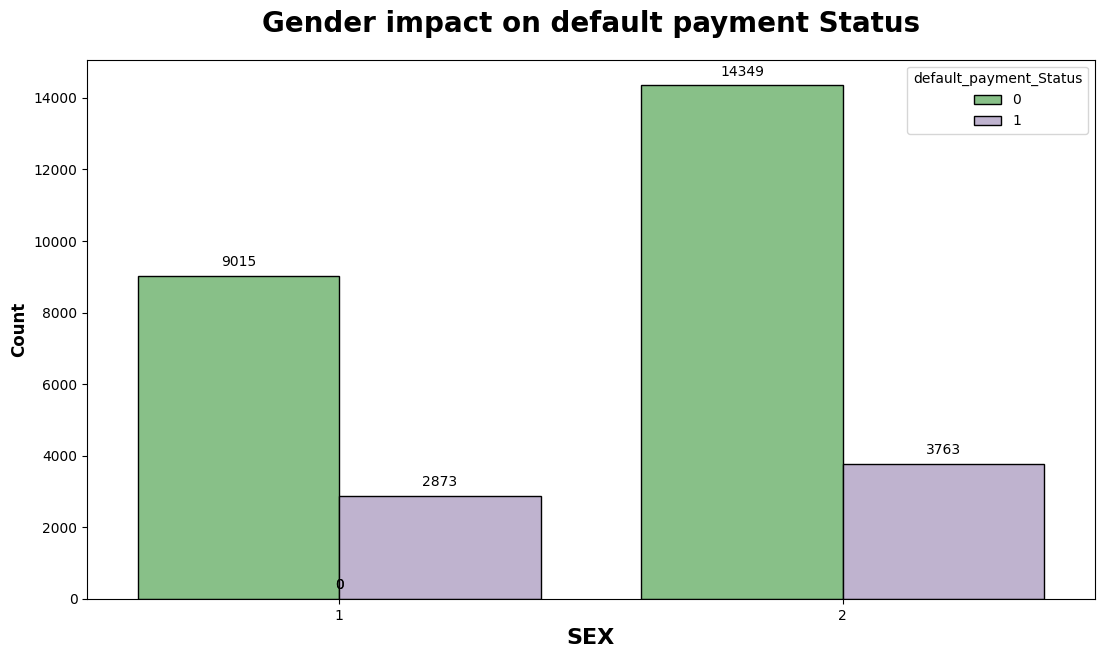

In [201]:
plt.subplots(figsize=(13, 7))
ax = sns.countplot(x="SEX", hue="default payment next month", data=df, ec="black", palette="Accent")
plt.title("Gender impact on default payment Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("SEX", weight="bold", fontsize=16)
plt.legend(title="default_payment_Status", fancybox=True)

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()


In [202]:
df2=df.copy()

SEX
2    3763
1    2873
Name: count, dtype: int64
SEX
2    20.776281
1    24.167227
Name: count, dtype: float64


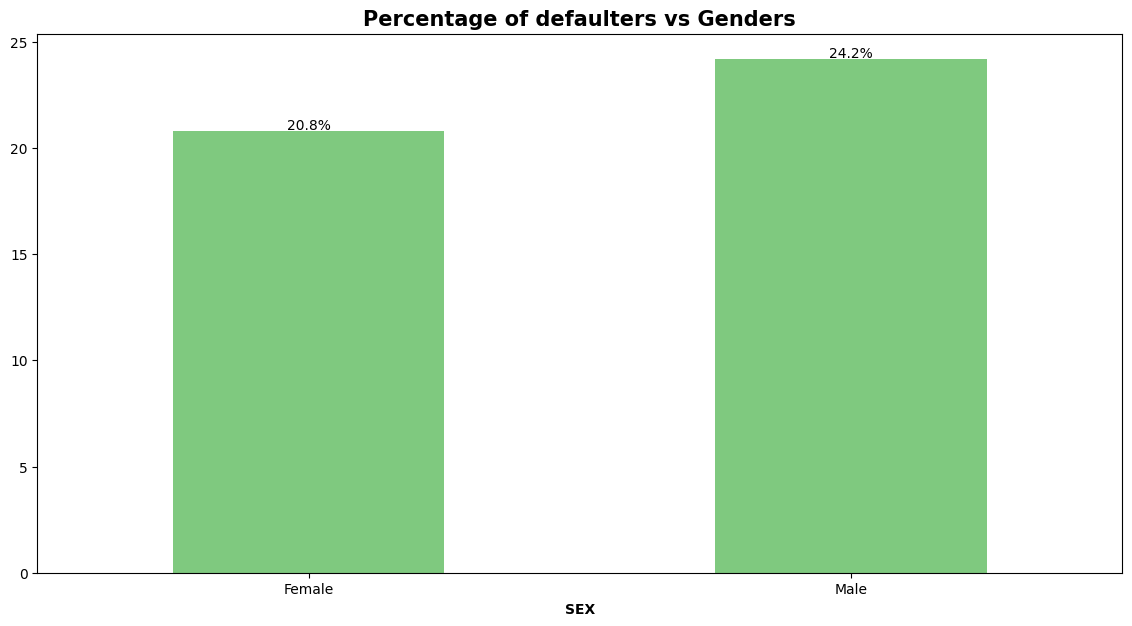

In [203]:
order1 = (100*df2[df2["default payment next month"].isin([1])]['SEX'].value_counts()/df2['SEX'].value_counts())
print(df2[df2["default payment next month"].isin([1])]['SEX'].value_counts())
print(order1)
# Convert order1 to a Series with integer indices
order1 = order1.rename({1: 'Male', 2: 'Female'})

# Plotting code remains the same
plt.figure(figsize=[14,7])
(order1).plot(kind='bar', stacked=True, colormap='Accent')
plt.title("Percentage of defaulters vs Genders", fontsize=15, fontweight='bold')
for i in range(order1.shape[0]):
    count = order1[i]
    strt = '{:0.1f}%'.format(count)
    plt.text(i, count + 0.1, strt, ha='center')

plt.xlabel('SEX', fontweight='bold')
plt.xticks(rotation=0)
plt.show()


- **Report from SEX**
- Higest defaulters from Male 
- 24% defaulters from male
- 20.8% defaulters from female
- most of the defaulters from male 

### 4.4 Does applicant's education has any impact o  credit_card_default ?

### Education 

1 = graduate school,

2 = university,

3 = high school,

0 = others

In [204]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [205]:
df["EDUCATION"]=df["EDUCATION"].replace({4:0,5:0,6:0})

In descption of dataset said except 1,2,3 any other number taken count as 0 so in our data of education others data also available number as 4,5,6 so all this numbers convert into as 0 only

In [206]:
#group data by Education and their count of case_status

df.groupby('EDUCATION')['default payment next month'].value_counts(normalize=True).to_frame()*100

proportion
EDUCATION default payment next month            
0         0                            92.948718
          1                             7.051282
1         0                            80.765234
          1                            19.234766
2         0                            76.265146
          1                            23.734854
3         0                            74.842384
          1                            25.157616

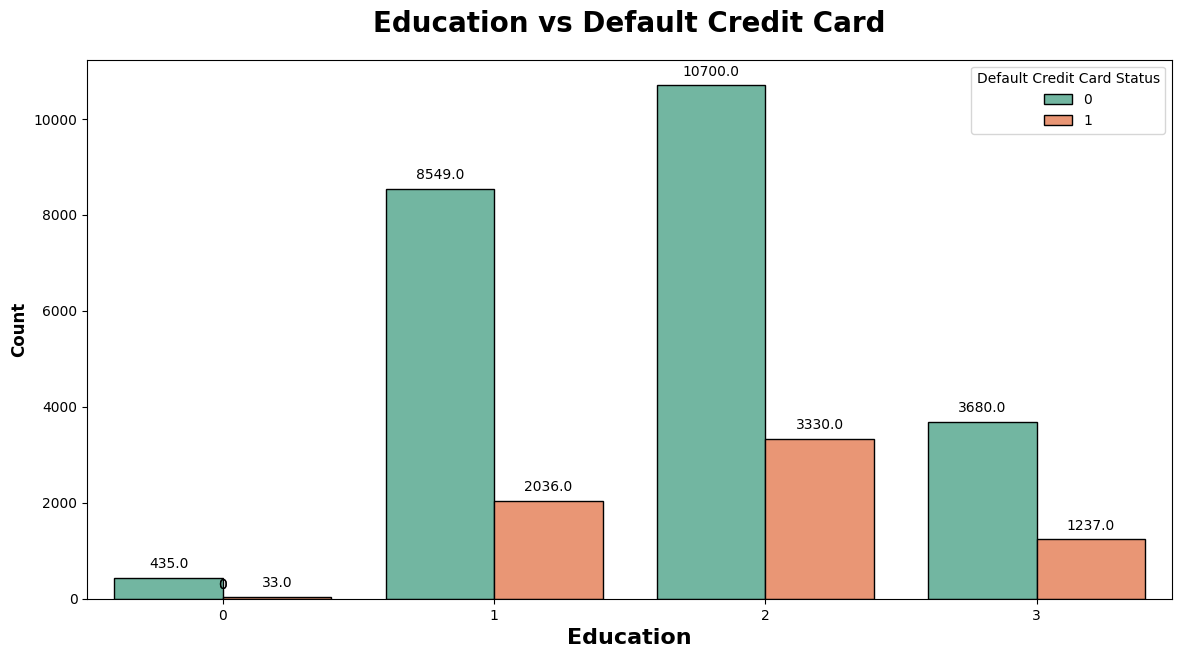

In [207]:
plt.subplots(figsize=(14, 7))
ax = sns.countplot(x="EDUCATION", hue="default payment next month", data=df, ec="black", palette="Set2")

plt.title("Education vs Default Credit Card", weight="bold", fontsize=20, pad=20)
plt.xlabel("Education", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.legend(title="Default Credit Card Status", fancybox=True)

# Adding count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


1 = graduate school,

2 = university,

3 = high school,

0 = others

In [208]:
df2=df.copy()

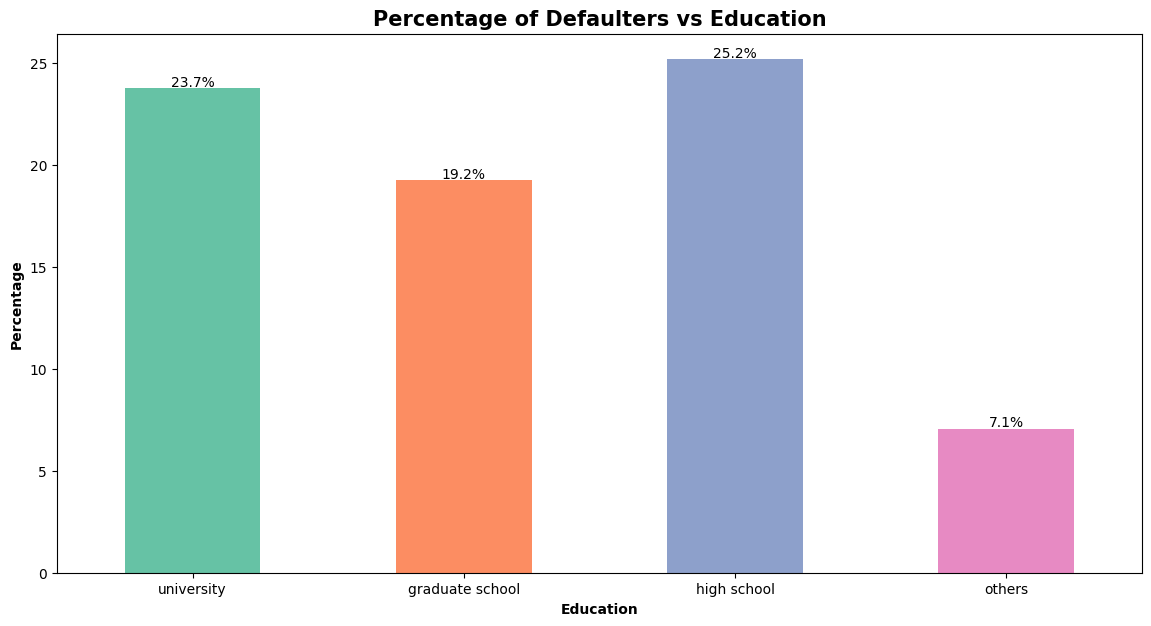

In [209]:
order1 = (100*df2[df2["default payment next month"].isin([1])]['EDUCATION'].value_counts()/df2['EDUCATION'].value_counts())

# Convert order1 to a Series with meaningful labels
order1 = order1.rename({1: 'graduate school', 2: 'university', 3: "high school", 0: "others"})

# Plotting
plt.figure(figsize=[14, 7])
(order1).plot(kind='bar', stacked=True, color=sns.color_palette("Set2", len(order1)))
plt.title("Percentage of Defaulters vs Education", fontsize=15, fontweight='bold')
for i, v in enumerate(order1):
    plt.text(i, v + 0.1, f'{v:.1f}%', ha='center')

plt.xlabel('Education', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

**Report**
- As per the charts High school applicants were more defaulters compared to those

- 25.2%defaulters are from  High School people
- this is followed by university people with 23.7% defaulters
- Highest chance of defaulters from `high school` and followed by `university`

**MARRIAGE**

Married = 1

Singles = 2

others = 3


In [210]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In our data describe about married persons represented with 1, singles represented with 2, others represented with 3, but out dataset include "0" but it tells about anything so we simply move to others category

In [211]:
df['MARRIAGE']=df['MARRIAGE'].replace({0:3})

In [212]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

### 4.6 Does Marriage  has any impact on credit card defaults?

In [213]:
#group data by marriage and count the number of default credit card
df.groupby('MARRIAGE')['default payment next month'].value_counts(normalize=True)

MARRIAGE  default payment next month
1         0                             0.765283
          1                             0.234717
2         0                             0.790717
          1                             0.209283
3         0                             0.763926
          1                             0.236074
Name: proportion, dtype: float64

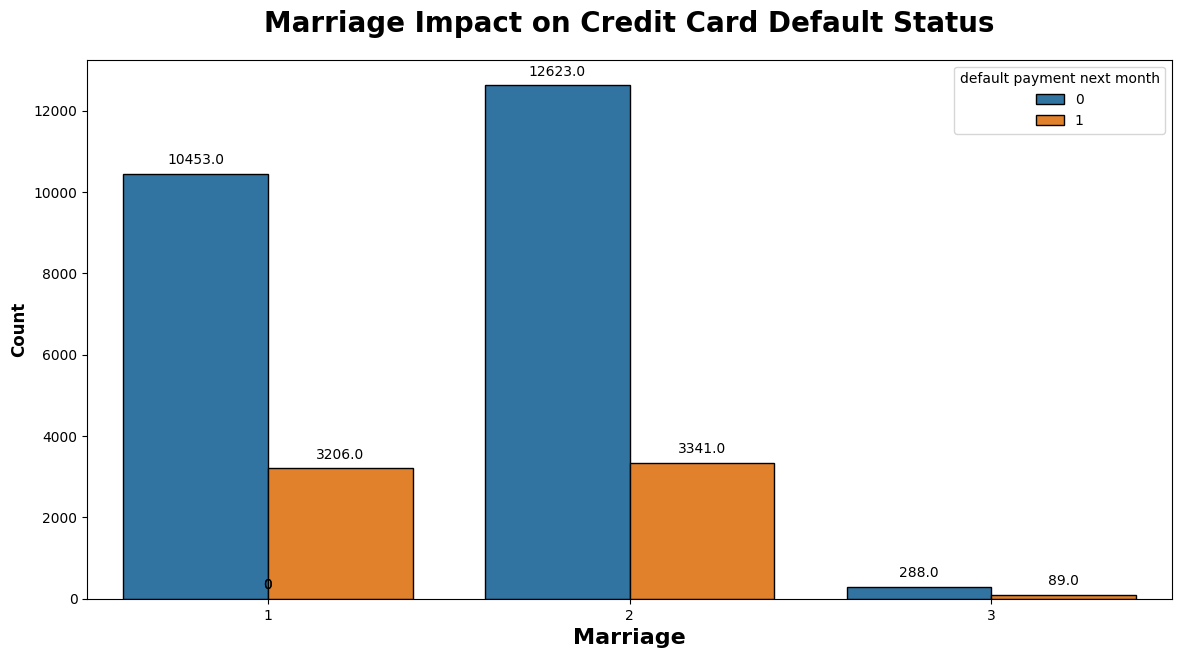

In [214]:
plt.subplots(figsize=(14, 7))
ax = sns.countplot(x="MARRIAGE", hue="default payment next month", data=df, ec='k')

plt.title("Marriage Impact on Credit Card Default Status", weight="bold", fontsize=20, pad=20)
plt.xlabel("Marriage", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)

# Adding count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [215]:
df2=df.copy()

MARRIAGE
2    3341
1    3206
3      89
Name: count, dtype: int64
MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64
MARRIAGE
2    20.928339
1    23.471704
3    23.607427
Name: count, dtype: float64


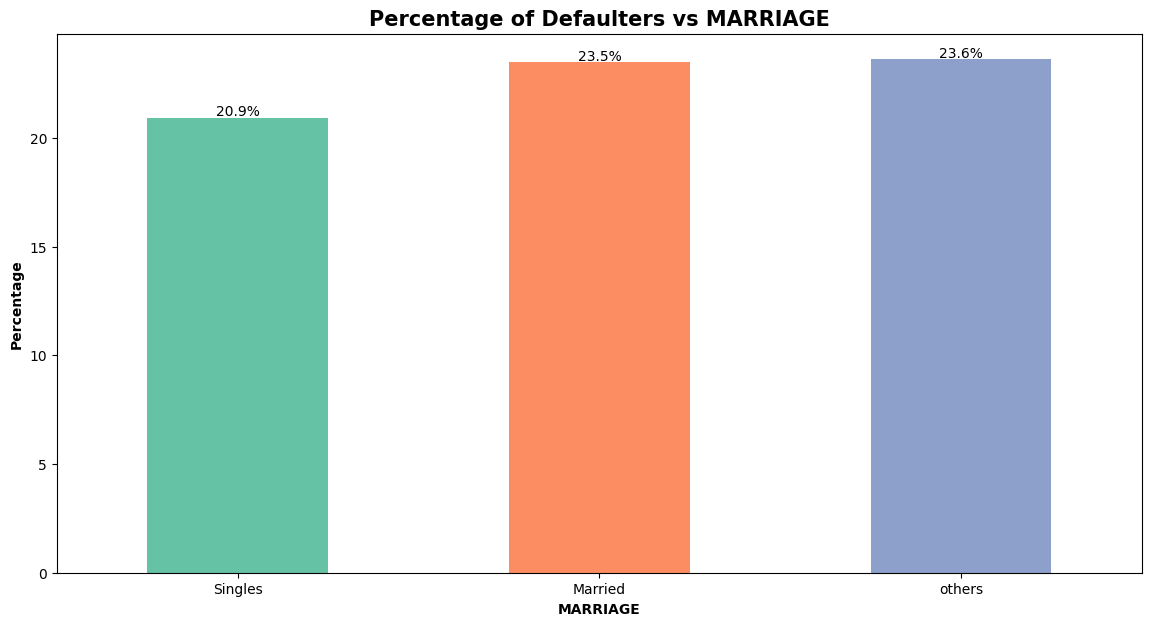

In [216]:
print(df2[df2["default payment next month"].isin([1])]['MARRIAGE'].value_counts())
print(df2['MARRIAGE'].value_counts())
order1 = (100*df2[df2["default payment next month"].isin([1])]['MARRIAGE'].value_counts()/df2['MARRIAGE'].value_counts())
print(order1)
# Convert order1 to a Series with meaningful labels
order1 = order1.rename({1: 'Married', 2: 'Singles', 3: "others"})

# Plotting
plt.figure(figsize=[14, 7])
(order1).plot(kind='bar', stacked=True, color=sns.color_palette("Set2", len(order1)))
plt.title("Percentage of Defaulters vs MARRIAGE", fontsize=15, fontweight='bold')
for i, v in enumerate(order1):
    plt.text(i, v + 0.1, f'{v:.1f}%', ha='center')

plt.xlabel('MARRIAGE', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

**Report**
- As per the charts married and others applicants were more defaulters compared to those

- 23.6%defaulters are from  other 
- this is followed by married people with 23.5% defaulters
- Highest chance of defaulters from `others` and followed by `married`

### 4.6 Does AGE  has any impact on credit card defaults?

In [217]:
#group data by age  and count the number of default credit card
df.groupby('AGE')['default payment next month'].value_counts(normalize=True)

AGE  default payment next month
21   0                             0.791045
     1                             0.208955
22   0                             0.698214
     1                             0.301786
23   0                             0.734694
                                     ...   
73   0                             0.250000
74   0                             1.000000
75   0                             0.666667
     1                             0.333333
79   0                             1.000000
Name: proportion, Length: 109, dtype: float64

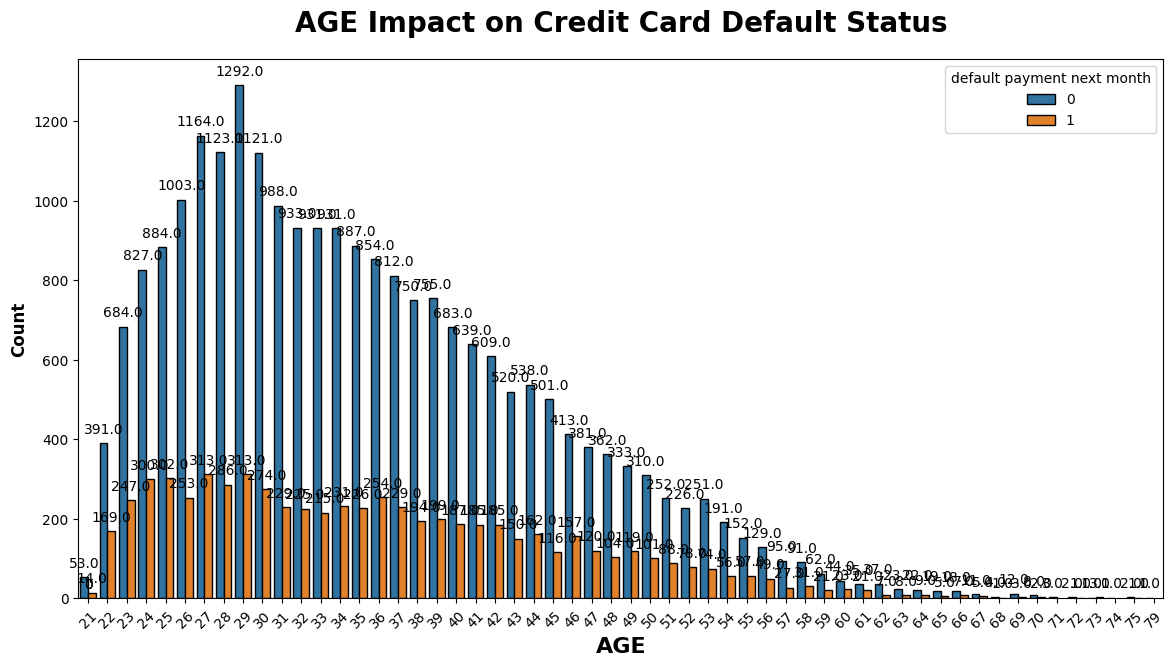

In [218]:
plt.subplots(figsize=(14, 7))
ax = sns.countplot(x="AGE", hue="default payment next month", data=df, ec='k')

plt.title("AGE Impact on Credit Card Default Status", weight="bold", fontsize=20, pad=20)
plt.xlabel("AGE", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)

# Adding count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()


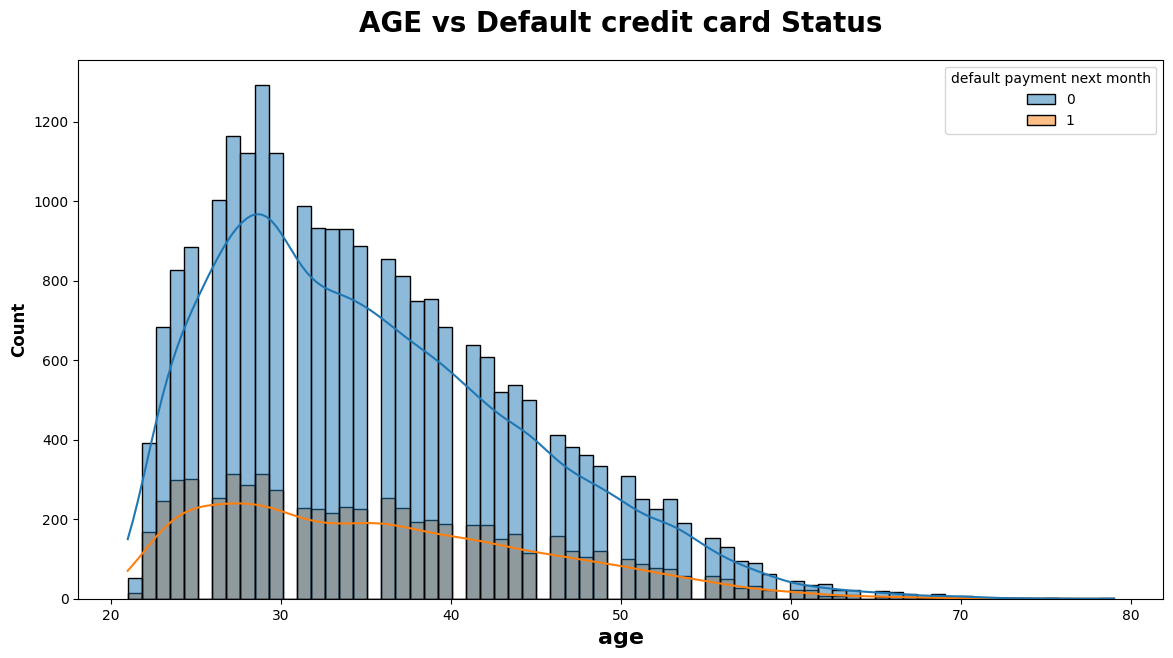

In [219]:
plt.subplots(figsize=(14,7))
sns.histplot(x="AGE",hue="default payment next month", data=df, kde=True)
plt.title("AGE vs Default credit card Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("age", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

**Report**
- As per the charts 29th age people  were more defaulters compared to those

- 313defaulters(19.5%) are from  29th age 
- this is followed by married people with 27th age group defaulters
- Highest chance of defaulters from `29th` and followed by `27th`

**Renaming of the columns**

In [220]:
# renameing column Names


df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [222]:
Bill_amt=["BILL_AMT_SEPT","BILL_AMT_AUG","BILL_AMT_JUL","BILL_AMT_JUN","BILL_AMT_MAY","BILL_AMT_APR"]

paid_month=["PAY_AMT_SEPT","PAY_AMT_AUG","PAY_AMT_JUL","PAY_AMT_JUN","PAY_AMT_MAY","PAY_AMT_APR"]

### 4.6 Does Payment  has any impact on credit card defaults?

The "PAY_n" variables show how many months a payment is late. A value of "-1" meaning the payment was made on time according to the document. However, the meaning of "-2" and "0" is not clear. To make things clearer, it would be a good idea to consider "on-time payment" as 0

In [224]:
def replace_to_zero(col):
    fil = (df[col] == -2) | (df[col] == -1) | (df[col] == 0)
    df.loc[fil, col] = 0

for i in ["PAY_SEPT", "PAY_AUG", "PAY_JUL", "PAY_JUN", "PAY_MAY", "PAY_APR"]:
    replace_to_zero(i)

In [228]:
#group data by pay_sept and their count of count of the default payment next month
df.groupby("PAY_SEPT")['default payment next month'].value_counts(normalize=True).to_frame()*100

proportion
PAY_SEPT default payment next month            
0        0                            86.165991
         1                            13.834009
1        0                            66.052061
         1                            33.947939
2        1                            69.141357
         0                            30.858643
3        1                            75.776398
         0                            24.223602
4        1                            68.421053
         0                            31.578947
5        0                            50.000000
         1                            50.000000
6        1                            54.545455
         0                            45.454545
7        1                            77.777778
         0                            22.222222
8        1                            57.894737
         0                            42.105263

In [233]:
#group data by pay_aug and their count of count of the default payment next month
df.groupby("PAY_AUG")['default payment next month'].value_counts(normalize=True).to_frame()*100

proportion
PAY_AUG default payment next month            
0       0                            83.725843
        1                            16.274157
1       0                            82.142857
        1                            17.857143
2       1                            55.614973
        0                            44.385027
3       1                            61.656442
        0                            38.343558
4       1                            50.505051
        0                            49.494949
5       1                            60.000000
        0                            40.000000
6       1                            75.000000
        0                            25.000000
7       1                            60.000000
        0                            40.000000
8       0                           100.000000

In [234]:
#group data by pay_july and their count of count of the default payment next month
df.groupby("PAY_JUL")['default payment next month'].value_counts(normalize=True).to_frame()*100

proportion
PAY_JUL default payment next month            
0       0                            82.805289
        1                            17.194711
1       0                            75.000000
        1                            25.000000
2       1                            51.557999
        0                            48.442001
3       1                            57.500000
        0                            42.500000
4       1                            57.894737
        0                            42.105263
5       1                            57.142857
        0                            42.857143
6       1                            60.869565
        0                            39.130435
7       1                            81.481481
        0                            18.518519
8       1                            66.666667
        0                            33.333333

In [235]:
#group data by pay_june and their count of count of the default payment next month
df.groupby("PAY_JUN")['default payment next month'].value_counts(normalize=True).to_frame()*100

proportion
PAY_JUN default payment next month            
0       0                            82.042280
        1                            17.957720
1       1                            50.000000
        0                            50.000000
2       1                            52.326686
        0                            47.673314
3       1                            61.111111
        0                            38.888889
4       1                            66.666667
        0                            33.333333
5       1                            51.428571
        0                            48.571429
6       0                            60.000000
        1                            40.000000
7       1                            82.758621
        0                            17.241379
8       0                            50.000000
        1                            50.000000

In [236]:
#group data by pay_may  and their count of count of the default payment next month
df.groupby("PAY_MAY")['default payment next month'].value_counts(normalize=True).to_frame()*100

proportion
PAY_MAY default payment next month            
0       0                            81.551495
        1                            18.448505
2       1                            54.188880
        0                            45.811120
3       1                            63.483146
        0                            36.516854
4       1                            60.714286
        0                            39.285714
5       1                            58.823529
        0                            41.176471
6       1                            75.000000
        0                            25.000000
7       1                            82.758621
        0                            17.241379
8       1                           100.000000

In [237]:
#group data by pay_may  and their count of count of the default payment next month
df.groupby("PAY_APR")['default payment next month'].value_counts(normalize=True).to_frame()*100

proportion
PAY_APR default payment next month            
0       0                            81.334274
        1                            18.665726
2       1                            50.650759
        0                            49.349241
3       1                            64.130435
        0                            35.869565
4       1                            63.265306
        0                            36.734694
5       1                            53.846154
        0                            46.153846
6       1                            73.684211
        0                            26.315789
7       1                            82.608696
        0                            17.391304
8       1                           100.000000

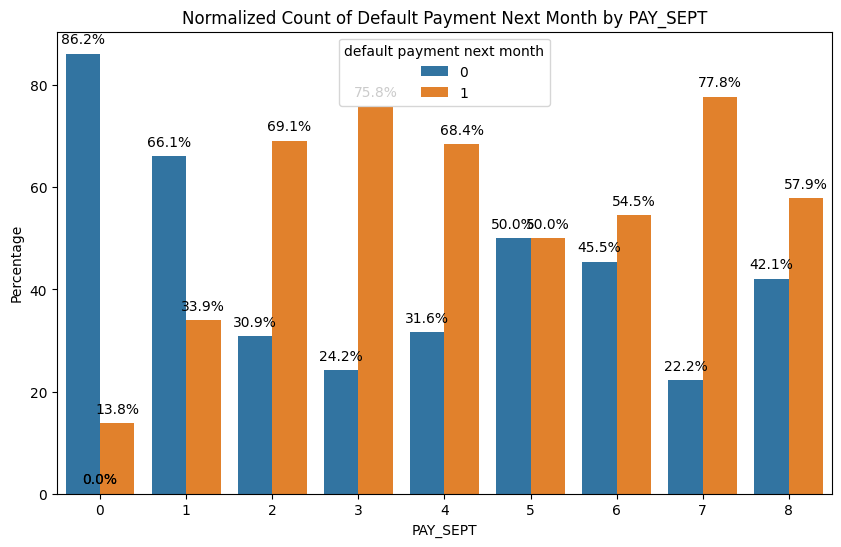

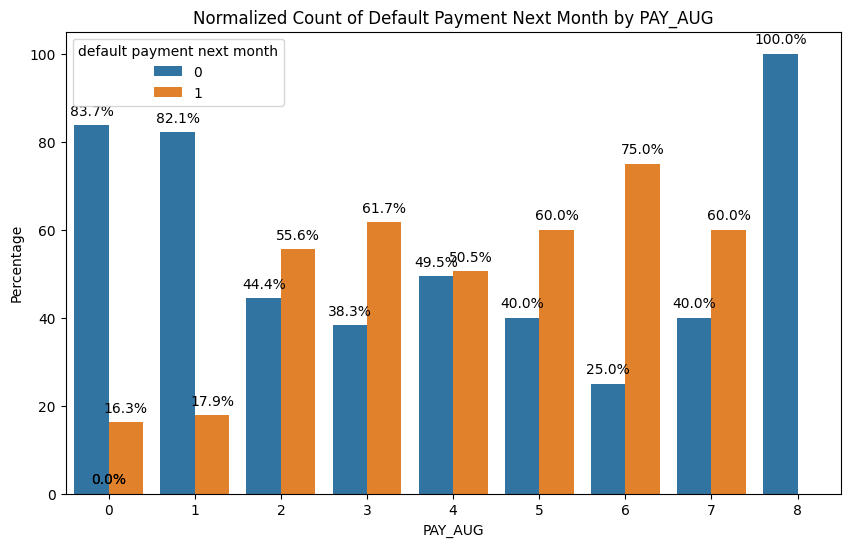

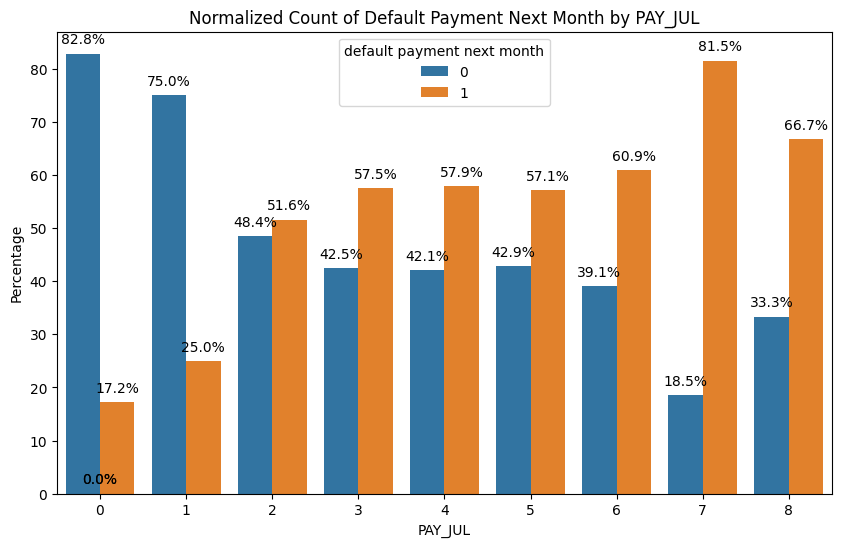

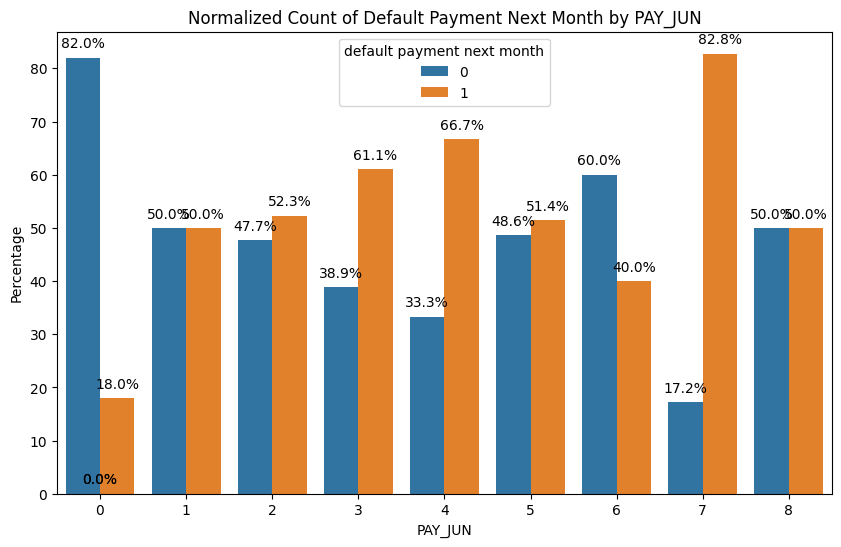

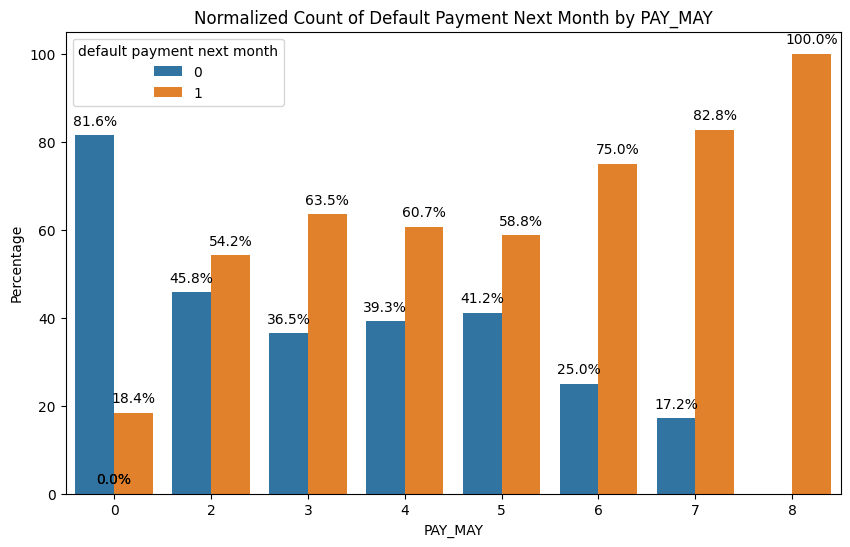

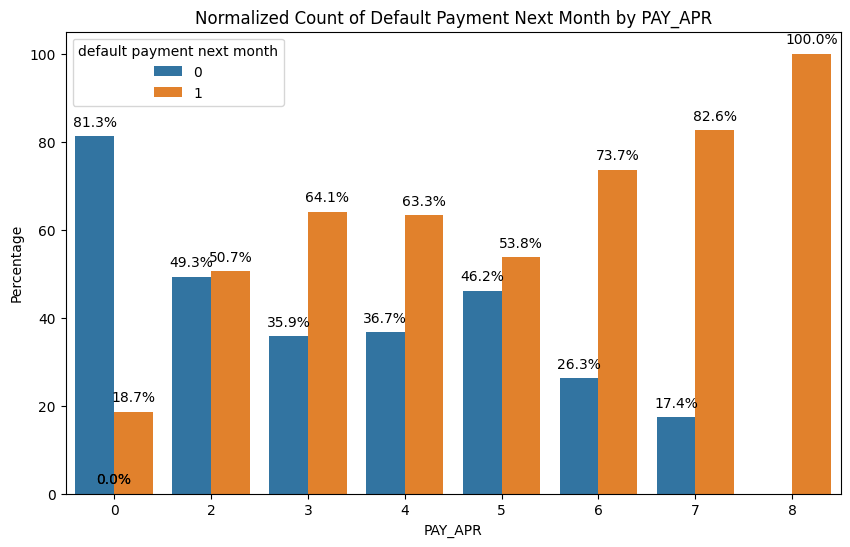

In [231]:
payment = ["PAY_SEPT", "PAY_AUG", "PAY_JUL", "PAY_JUN", "PAY_MAY", "PAY_APR"]

for col in payment:
    grouped_data = df.groupby(col)['default payment next month'].value_counts(normalize=True).to_frame() * 100
    grouped_data.columns = ['Percentage']  # Rename the column to 'Percentage'
    grouped_data.reset_index(inplace=True)
    
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=col, y="Percentage", hue="default payment next month", data=grouped_data)
    plt.title(f'Normalized Count of Default Payment Next Month by {col}')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    
    # Add percentage labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.show()


### 4.6 Does Bill_amount  has any impact on credit card defaults?

- April month billing effect on credit card defaults

In [66]:
df.groupby('BILL_AMT_APR')['default payment next month'].value_counts(normalize=True).to_frame()*100

,,proportion
BILL_AMT_APR,default payment next month,
-339603,1,100.0
-209051,0,100.0
-150953,0,100.0
-94625,1,100.0
-73895,0,100.0
...,...,...
527566,0,100.0
527711,0,100.0
568638,0,100.0


In [73]:
df.groupby('BILL_AMT_MAY')['default payment next month'].value_counts(normalize=True).to_frame()*100

,,proportion
BILL_AMT_MAY,default payment next month,
-81334,0,100.0
-61372,0,100.0
-53007,1,100.0
-46627,1,100.0
-37594,0,100.0
...,...,...
547880,1,100.0
551702,0,100.0
587067,0,100.0


In [74]:
df.groupby('BILL_AMT_JUN')['default payment next month'].value_counts(normalize=True).to_frame()*100

,,proportion
BILL_AMT_JUN,default payment next month,
-170000,0,100.0
-81334,0,100.0
-65167,1,100.0
-50616,1,100.0
-46627,1,100.0
...,...,...
572805,0,100.0
616836,0,100.0
628699,0,100.0


In [75]:
df.groupby('BILL_AMT_JUL')['default payment next month'].value_counts(normalize=True).to_frame()*100

,,proportion
BILL_AMT_JUL,default payment next month,
-157264,0,100.0
-61506,1,100.0
-46127,1,100.0
-34041,0,100.0
-25443,1,100.0
...,...,...
689627,0,100.0
689643,0,100.0
693131,0,100.0


In [76]:
df.groupby('BILL_AMT_AUG')['default payment next month'].value_counts(normalize=True).to_frame()*100

,,proportion
BILL_AMT_AUG,default payment next month,
-69777,0,100.0
-67526,0,100.0
-33350,0,100.0
-30000,0,100.0
-26214,0,100.0
...,...,...
624475,0,100.0
646770,0,100.0
671563,0,100.0


In [77]:
df.groupby('BILL_AMT_SEPT')['default payment next month'].value_counts(normalize=True).to_frame()*100

,,proportion
BILL_AMT_SEPT,default payment next month,
-165580,0,100.0
-154973,0,100.0
-15308,0,100.0
-14386,0,100.0
-11545,0,100.0
...,...,...
626648,0,100.0
630458,0,100.0
653062,0,100.0


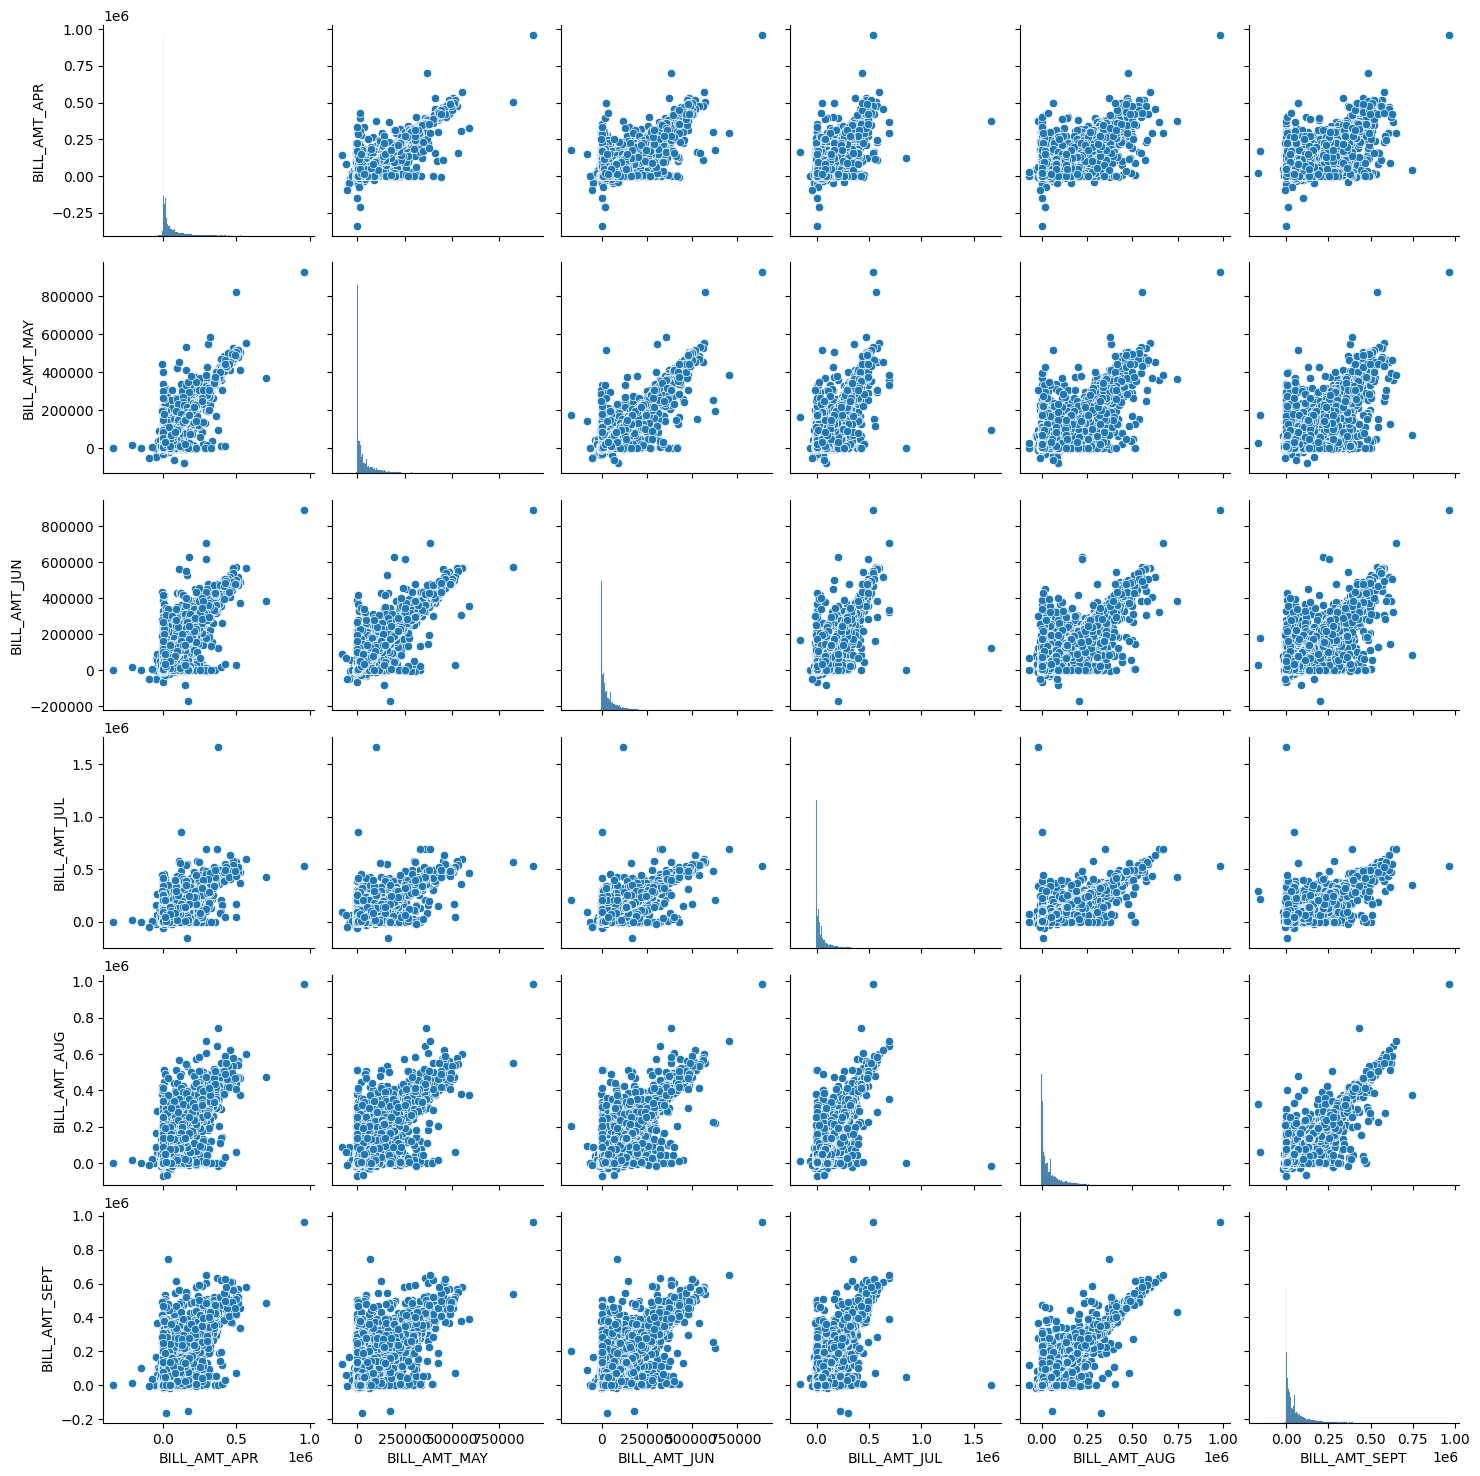

In [72]:
bill_amount=df[['BILL_AMT_APR',  'BILL_AMT_MAY',   'BILL_AMT_JUN',   'BILL_AMT_JUL',   'BILL_AMT_AUG',   'BILL_AMT_SEPT']]

sns.pairplot(data=bill_amount)

plt.show()

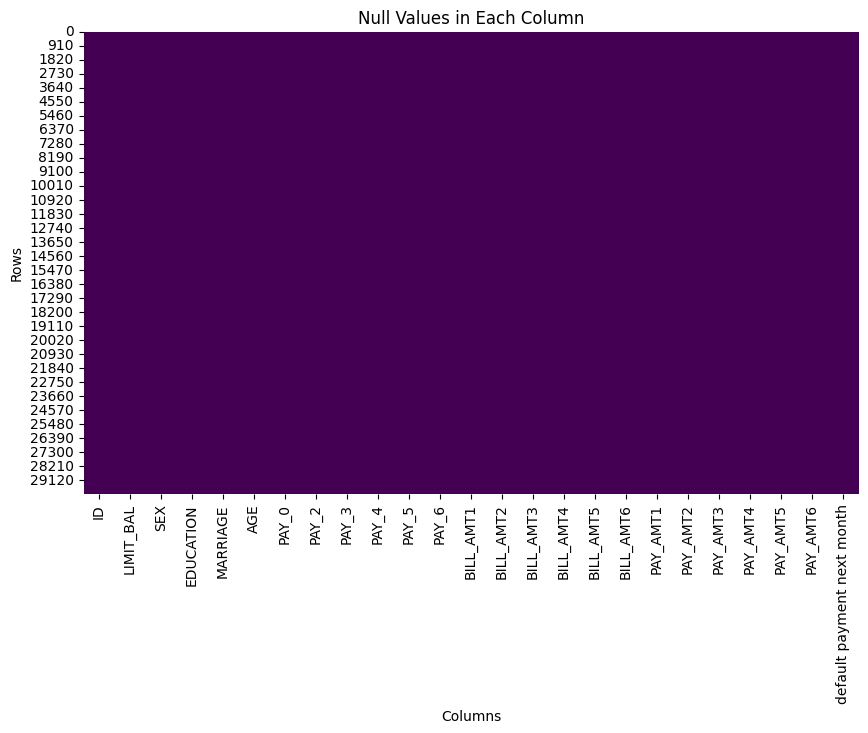

In [108]:
def plot_null_values_heatmap(df):
    # Generate a boolean dataframe indicating null values
    null_df = df.isnull()
    
    # Plotting the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(null_df, cmap='viridis', cbar=False)
    plt.title('Null Values in Each Column')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()

plot_null_values_heatmap(df)
